# Small Numerical Example
Here is the Longstaff and Schwartz (2001) small numerical example showcased in python.
See: Longstaff, F. A., & Schwartz, E. S. (2001). Valuing American Options by Simulation: A Simple Least-Squares Approach. The Review of Financial Studies, 14(1), 113–147. https://doi.org/10.1093/rfs/14.1.113 

# General Description
You can refer to the [original paper here](https://doi.org/10.1093/rfs/14.1.113)
You can also [Download the Excel file](https://github.com/pletourneau-lsmc/SUPER_LSMC/raw/main/fundamental/L-S_small_example.xlsx)

# Main objective
The main objective is to make the LSMC algorithm accessible to understand by braking it down into seperate steps.
The program below is not showing the optimal way of programming the LSMC method.


In [ ]:
# Set the initial variables for the script
import numpy as np

# Define parameters
r = 0.06    # Interest rate
K = 1.10    # Strike price
T = 3       # Time to maturity in time-steps

"""
Important note:
In this example, the option has 3 years to maturity with annual exercise possibilities.
In this context, the time-steps correspond to years. It is very convenient.

In more realistic scenarios, it will not be the case.
In those cases, we will track tie using time-steps, but we will have a way to convert to years when needed.
"""

# Create array of simulated stock prices
S = np.array([
    [1.00, 1.09, 1.08, 1.34],
    [1.00, 1.16, 1.26, 1.54],
    [1.00, 1.22, 1.07, 1.03],
    [1.00, 0.93, 0.97, 0.92],
    [1.00, 1.11, 1.56, 1.52],
    [1.00, 0.76, 0.77, 0.90],
    [1.00, 0.92, 0.84, 1.01],
    [1.00, 0.88, 1.22, 1.34]
])

print("S matrix:\n", S)



S matrix:
 [[1.   1.09 1.08 1.34]
 [1.   1.16 1.26 1.54]
 [1.   1.22 1.07 1.03]
 [1.   0.93 0.97 0.92]
 [1.   1.11 1.56 1.52]
 [1.   0.76 0.77 0.9 ]
 [1.   0.92 0.84 1.01]
 [1.   0.88 1.22 1.34]]


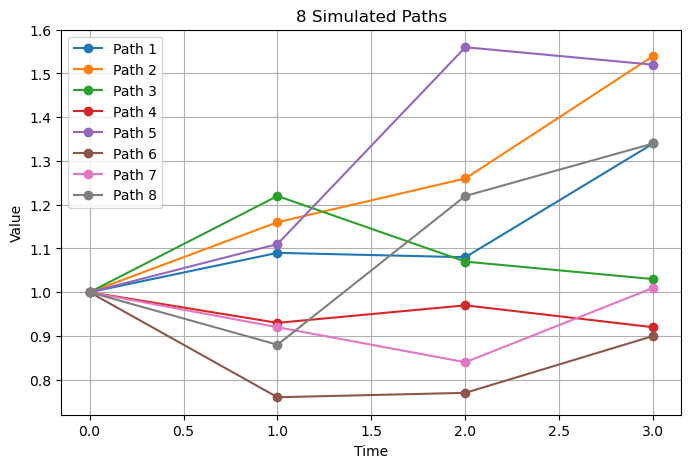

In [3]:
import matplotlib.pyplot as plt

# Now plot the simulated paths if we want too
times = [0, 1, 2, 3]

plt.figure(figsize=(8, 5))
for i in range(S.shape[0]):
    plt.plot(times, S[i], marker='o', label=f'Path {i+1}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('8 Simulated Paths')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Initiate the backward algorithm and calculate the option payoff (exercise/intrinsic value), conditional on not exercising prior

# We will calculate the payoff (exercise/intrinsic value) for each path
# recall that the option to price is a put option
payoff = np.maximum(K - S, 0)

# Assuming payoff is a 2D NumPy array
print(np.array2string(payoff, formatter={'float_kind':lambda x: f"{x:.4f}"}))


[[0.1000 0.0100 0.0200 0.0000]
 [0.1000 0.0000 0.0000 0.0000]
 [0.1000 0.0000 0.0300 0.0700]
 [0.1000 0.1700 0.1300 0.1800]
 [0.1000 0.0000 0.0000 0.0000]
 [0.1000 0.3400 0.3300 0.2000]
 [0.1000 0.1800 0.2600 0.0900]
 [0.1000 0.2200 0.0000 0.0000]]


In [4]:
# Now we set the vector exec_t to maturity for each path
exec_t = np.array([3, 3, 3, 3, 3, 3, 3, 3], dtype=int)  # All paths would optimally be exercised at time-step 3 (so far))

In [8]:
# Now, we can start the backward algorithm at t=T-1=2

# STEP 1	Discount the cash flows to time "t" based on when it's optimal to exercise for each path
# STEP 2	Identify the ITM paths in order toregress only on ITM paths
# STEP 3	Build X matrix for regression
# STEP 4	build y vector
# STEP 5	regress to get beta
# STEP 6	Calculate y_hat to approximate the holding value function
# STEP 7	Update the optimal exercise time for each path

t_now = 2  # Current time step (T-1)

# STEP 1
dcf = np.exp(-r * (T - t_now)) * payoff[:, t_now+1]  # Discounted cash flow to time t
print("Discounted Cash Flows (DCF):\n", np.array2string(dcf, formatter={'float_kind':lambda x: f"{x:.4f}"}))

# STEP 2
itm_paths = np.where(S[:, t_now] < K)[0]  # Identify ITM paths

# STEP 3
# Build X matrix for regression (using the stock prices at time t_now)
# We use a constant, the stock price and the square of the stock price
X = np.column_stack((np.ones(len(itm_paths)), S[itm_paths, t_now], S[itm_paths, t_now]**2))
print("X matrix for regression:\n", np.array2string(X, formatter={'float_kind':lambda x: f"{x:.4f}"}))

# STEP 4
# Build y vector (the discounted cash flows for ITM paths)
y = dcf[itm_paths]
print("y vector for regression:\n", np.array2string(y, formatter={'float_kind':lambda x: f"{x:.4f}"}))

# STEP 5
# Perform regression to get beta coefficients
from numpy.linalg import lstsq
beta = lstsq(X, y, rcond=None)[0]
print("Beta coefficients:\n", np.array2string(beta, formatter={'float_kind':lambda x: f"{x:.4f}"}))

# STEP 6
# Calculate y_hat to approximate the holding value function
y_hat = X @ beta
print("y_hat (holding value function):\n", np.array2string(y_hat, formatter={'float_kind':lambda x: f"{x:.4f}"}))

# STEP 7
# Update the optimal exercise time for each path
exec_t[itm_paths] = np.where(y_hat < payoff[itm_paths, t_now], t_now, exec_t[itm_paths])
print("Updated execution times:\n", exec_t)



Discounted Cash Flows (DCF):
 [0.0000 0.0000 0.0659 0.1695 0.0000 0.1884 0.0848 0.0000]
X matrix for regression:
 [[1.0000 1.0800 1.1664]
 [1.0000 1.0700 1.1449]
 [1.0000 0.9700 0.9409]
 [1.0000 0.7700 0.5929]
 [1.0000 0.8400 0.7056]]
y vector for regression:
 [0.0000 0.0659 0.1695 0.1884 0.0848]
Beta coefficients:
 [-1.0700 2.9834 -1.8136]
y_hat (holding value function):
 [0.0367 0.0459 0.1175 0.1520 0.1564]
Updated execution times:
 [3 3 3 2 3 2 2 3]


In [10]:
# Let us now repeat the backward induction for t=1
t_now = 1  # Current time step (T-2)
# STEP 1
# this time, we discount the cash flows to time "t" based on when it's optimal to exercise for each path
dcf = np.exp(-r * (exec_t - t_now)) * payoff[np.arange(len(exec_t)), exec_t]
print("Discounted Cash Flows (DCF) at t=1:\n", np.array2string(dcf, formatter={'float_kind':lambda x: f"{x:.4f}"}))

# STEP 2
itm_paths = np.where(S[:, t_now] < K)[0]  # Identify ITM paths

# STEP 3
# Build X matrix for regression (using the stock prices at time t_now)
X = np.column_stack((np.ones(len(itm_paths)), S[itm_paths, t_now], S[itm_paths, t_now]**2))
print("X matrix for regression at t=1:\n", np.array2string(X, formatter={'float_kind':lambda x: f"{x:.4f}"}))

# STEP 4
# Build y vector (the discounted cash flows for ITM paths)
y = dcf[itm_paths]
print("y vector for regression at t=1:\n", np.array2string(y, formatter={'float_kind':lambda x: f"{x:.4f}"}))

# STEP 5
# Perform regression to get beta coefficients
beta = lstsq(X, y, rcond=None)[0]
print("Beta coefficients at t=1:\n", np.array2string(beta, formatter={'float_kind':lambda x: f"{x:.4f}"}))

# STEP 6
# Calculate y_hat to approximate the holding value function
y_hat = X @ beta
print("y_hat (holding value function) at t=1:\n", np.array2string(y_hat, formatter={'float_kind':lambda x: f"{x:.4f}"}))

# STEP 7
# Update the optimal exercise time for each path
exec_t[itm_paths] = np.where(y_hat < payoff[itm_paths, t_now], t_now, exec_t[itm_paths])
print("Updated execution times at t=1:\n", exec_t)


Discounted Cash Flows (DCF) at t=1:
 [0.0000 0.0000 0.0621 0.1224 0.0000 0.3108 0.2449 0.0000]
X matrix for regression at t=1:
 [[1.0000 1.0900 1.1881]
 [1.0000 0.9300 0.8649]
 [1.0000 0.7600 0.5776]
 [1.0000 0.9200 0.8464]
 [1.0000 0.8800 0.7744]]
y vector for regression at t=1:
 [0.0000 0.1224 0.3108 0.2449 0.0000]
Beta coefficients at t=1:
 [2.0375 -3.3354 1.3565]
y_hat (holding value function) at t=1:
 [0.0135 0.1087 0.2861 0.1170 0.1528]
Updated execution times at t=1:
 [3 3 3 1 3 1 1 1]


In [11]:
# Finallym at t=0, we discount the cash flows to time "t" based on when it's optimal to exercise for each path
t_now = 0  # Current time step (T-3)
# STEP 1
dcf = np.exp(-r * (exec_t - t_now)) * payoff[np.arange(len(exec_t)), exec_t]
print("Discounted Cash Flows (DCF) at t=0:\n", np.array2string(dcf, formatter={'float_kind':lambda x: f"{x:.4f}"}))

# STEP 2
# To get the price estimate, we simply take the average of the discounted cash flows
price_estimate = np.mean(dcf)
print("Estimated Price of the Put Option:\n", f"{price_estimate:.4f}")

Discounted Cash Flows (DCF) at t=0:
 [0.0000 0.0000 0.0585 0.1601 0.0000 0.3202 0.1695 0.2072]
Estimated Price of the Put Option:
 0.1144
